In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from mnist import load_mnist
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
X_train = train[0]
y_train = train[1]

X_val = validation[0]
y_val = validation[1]

X_test = test[0]
y_test = test[1]

# 1

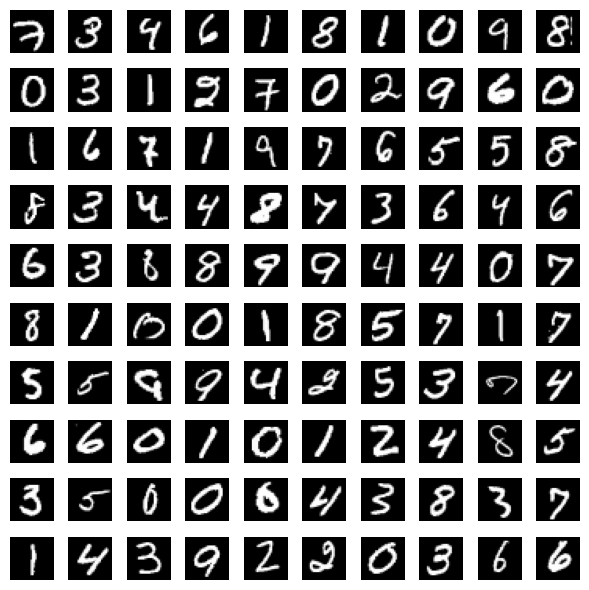

In [4]:
# Создаем сетку 2x2 для отображения 4 изображений
fig, axes = plt.subplots(10, 10, figsize=(6, 6))

# Проходим по каждой ячейке сетки и выводим отдельное изображение
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].squeeze(), cmap='gray')  # Используем squeeze для удаления последнего измерения
    ax.axis('off')  # Отключаем оси для чистоты

# Отображаем сетку изображений
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)
### Principal Component Analysis (PCA) — это метод понижения размерности данных, широко используемый в машинном обучении и статистике. PCA помогает уменьшить количество переменных в наборе данных, сохраняя при этом как можно больше информации. Это достигается путем создания новых переменных (главных компонент), которые являются линейными комбинациями исходных переменных.

In [5]:
class my_PCA():
    def __init__(self, n_components):
        #Инициализация класса PCA.
        
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        Обучение PCA на данных.
        
        # Центрирование данных (вычитание среднего)
        self.mean = np.mean(X, axis=0) # X - Входные данные, размерность (n_samples, n_features)
        X_centered = X - self.mean
        
        # Используем сингулярное разложение (SVD) для нахождения главных компонент
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        # Собственные векторы - это строки Vt, сортировка по убыванию собственных значений уже выполнена
        self.components = Vt[:self.n_components]

    def transform(self, X):
        #Преобразование данных в пространство главных компонент.
        # Центрируем данные
        
        X_centered = X - self.mean
        # Проецируем данные на главные компоненты
        return np.dot(X_centered, self.components.T)

    def fit_transform(self, X):
        #Обучение и преобразование данных.
        
        self.fit(X)
        return self.transform(X)


In [8]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

In [9]:
pca = my_PCA(n_components=15)

# Обучаем и преобразуем данные
X_train_pca = pca.fit_transform(X_train_flattened)

In [10]:
X_train_pca

array([[ 184.84280021, -620.39051841,  392.03255579, ...,  181.86051528,
        -142.0629125 ,   41.35288566],
       [ 120.60608341,  256.34248195,  127.8018581 , ...,  168.4374863 ,
         335.51954236,  -42.6079521 ],
       [ -23.94136279, -767.59628375,  542.76013046, ...,  440.88679449,
          86.95636173,  163.90526481],
       ...,
       [-181.10219952, -169.57937367,  258.32304111, ...,  172.5760187 ,
         105.5931111 ,  366.93259047],
       [ 127.39162019,    6.83081302, -510.3049312 , ..., -421.70894907,
         -72.62968189,  287.08667867],
       [-170.0542618 ,   21.50458889, -556.80863844, ...,  214.489602  ,
        -296.58861063,  172.01841676]])

In [11]:
# Собственные значения уже упорядочены по убыванию через SVD
explained_variance = np.var(X_train_pca, axis=0)
explained_variance

array([332422.11720725, 242554.03862731, 211759.6968946 , 184986.52780332,
       167389.60708716, 147518.99681498, 111869.86732379,  98831.94518728,
        94824.71723735,  81036.44429733,  72067.52044008,  69206.25521286,
        58939.27476613,  58246.76565896,  54016.50355485])

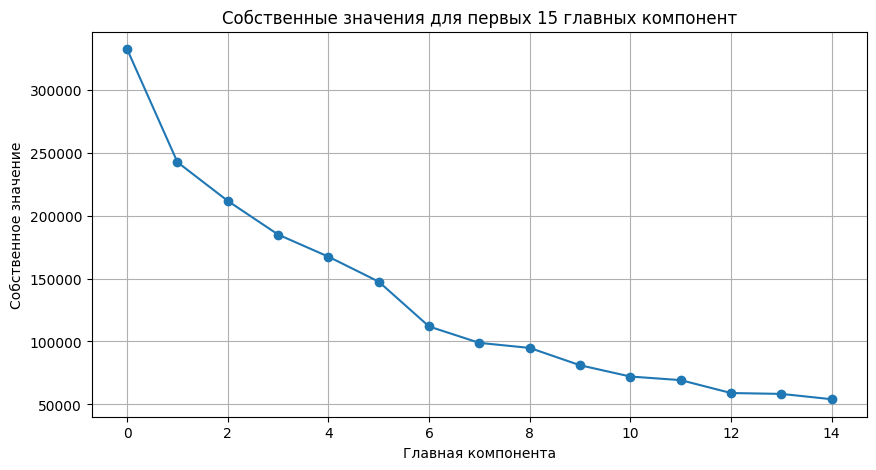

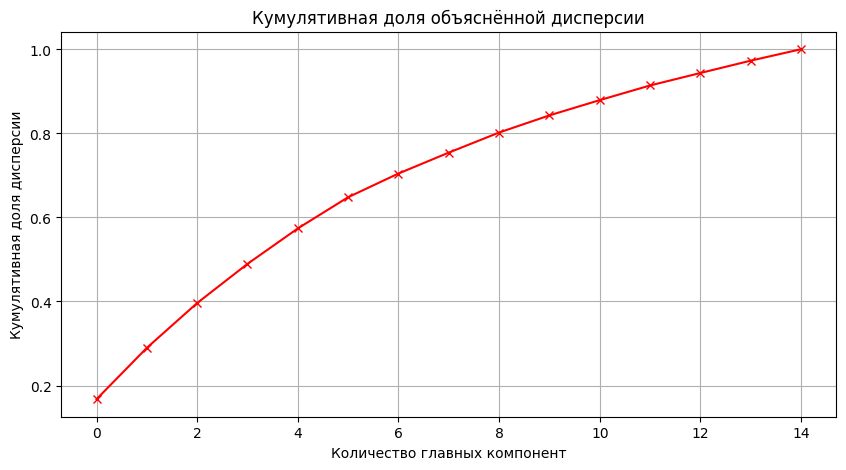

In [12]:
# Рассчитаем кумулятивную сумму дисперсии
cumulative_explained_variance = np.cumsum(explained_variance)
total_variance = cumulative_explained_variance[-1]
explained_variance_ratio = cumulative_explained_variance / total_variance


# Собственные значения
plt.figure(figsize=(10, 5))
plt.plot(explained_variance, marker='o', label='Собственные значения')
plt.title('Собственные значения для первых 15 главных компонент')
plt.xlabel('Главная компонента')
plt.ylabel('Собственное значение')
plt.grid(True)
plt.show()

# Кумулятивная сумма дисперсии
plt.figure(figsize=(10, 5))
plt.plot(explained_variance_ratio, marker='x', color='r', label='Кумулятивная доля дисперсии')
plt.title('Кумулятивная доля объяснённой дисперсии')
plt.xlabel('Количество главных компонент')
plt.ylabel('Кумулятивная доля дисперсии')
plt.grid(True)
plt.show()


- График собственные значения : Этот график показывает, насколько важна каждая из первых 15 главных компонент. Чем выше точка на графике, тем больше информации о данных она содержит. В начале компоненты более значимы, но к 10-й компоненте их важность сильно снижается.

- График кумулятивная доля объяснённой дисперсии:На этом графике показано, сколько общей информации сохраняется при добавлении каждой следующей компоненты. Например, первые несколько компонент объясняют около 80% всей информации, что значит, что оставшиеся компоненты добавляют меньше значимой информации.

Первые несколько компонент содержат большую часть информации. Это означает, что мы можем сократить размер данных, сохранив важные особенности, что упрощает анализ данных без потери точности.

Собственные числа показывают, сколько дисперсии (информации) данных улавливает каждая главная компонента. Чем больше собственное число, тем больше информации содержит эта компонента. Собственные числа представляют собой величины, которые показывают, сколько дисперсии (вариации) данных объясняет каждая главная компонента. Дисперсия данных — это разброс значений данных. В каждой главной компоненте собственное число указывает, сколько этого разброса объясняет данная компонента. Чем больше собственное число у компоненты, тем больше информации или разброса данных она объясняет.

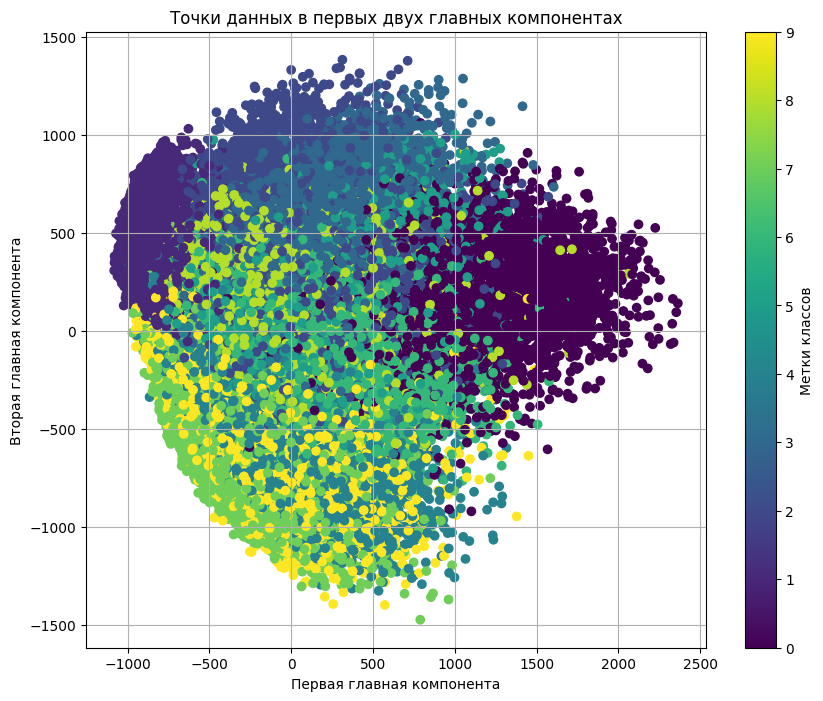

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("Точки данных в первых двух главных компонентах")
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Метки классов')
plt.grid(True)
plt.show()


Мы видим, что точки разных классов (разные цвета) значимо перекрываются. Это указывает на слабую линейную разделимость между классами в пространстве этих двух компонент. Для того чтобы классы были хорошо линейно разделимы, данные каждого класса должны образовывать четкие, отдельные группы, которые можно разделить прямыми линиями или гиперплоскостями.Для лучшей классификации можно использовать нелинейные методы.

# Алгоритм kNN

In [49]:
from collections import Counter
from sklearn.metrics import accuracy_score
import seaborn as sns

In [15]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        #Инициализация класса k-ближайших соседей.
           
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        #Обучение модели - сохранение обучающих данных.
        
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        #Прогнозирование классов для новых данных.
        
        predictions = []
        for x_test in X:
            # Вычисляем расстояния до всех точек обучающей выборки
            distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
            # Находим индексы ближайших соседей
            nearest_neighbors_indices = distances.argsort()[:self.n_neighbors]
            # Находим метки ближайших соседей
            nearest_labels = self.y_train[nearest_neighbors_indices]
            # Определяем класс по ближайшим соседям (голосование)
            most_common = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [16]:
knn_classifier = my_kNN(n_neighbors=5)
knn_classifier.fit(X_train_flattened, y_train)

In [19]:
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

In [21]:
# Предсказание на вал. выборке
y_val_pred = knn_classifier.predict(X_val_flattened)

In [29]:
# Оценка точности
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Точность модели на валидационной выборке: {int(round(accuracy*100, 0))}%')

Точность модели на валидационной выборке: 30%


In [42]:
# Шаг 3: Поиск оптимальных параметров
best_accuracy = 0
best_n_neighbors = 1
best_n_components = 1

# Сохраним все результаты для возможного анализа
results = []

# Определяем диапазоны параметров
neighbors_range = range(1, 31)  # От 1 до 30
components_range = range(1, 65)  # От 1 до 64

# Для прогресса можно использовать tqdm, но если нет, то просто сообщим о прогрессе
total_iterations = len(neighbors_range) * len(components_range)
current_iteration = 0

for n_components in components_range:
    # Применяем PCA с текущим количеством компонент
    pca = my_PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_flattened)
    X_val_pca = pca.transform(X_val_flattened)
    
    for n_neighbors in neighbors_range:
        # Обучаем kNN с текущим количеством соседей
        knn = my_kNN(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)
        y_val_pred = knn.predict(X_val_pca)
        accuracy = accuracy_score(y_val, y_val_pred)
        
        # Сохраняем результаты
        results.append((n_components, n_neighbors, accuracy))
        
        # Проверяем, лучший ли это результат
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_n_components = n_components
        
        # Обновление прогресса
        current_iteration += 1
        if current_iteration % 100 == 0 or current_iteration == total_iterations:
            print(f"Прогресс: {current_iteration}/{total_iterations} итераций завершено.")

print(f"Наилучшая точность: {int(round(best_accuracy*100, 0))}% при количестве компонент = {best_n_components} и количестве соседей = {best_n_neighbors}.")

Прогресс: 100/1920 итераций завершено.
Прогресс: 200/1920 итераций завершено.
Прогресс: 300/1920 итераций завершено.
Прогресс: 400/1920 итераций завершено.
Прогресс: 500/1920 итераций завершено.
Прогресс: 600/1920 итераций завершено.
Прогресс: 700/1920 итераций завершено.
Прогресс: 800/1920 итераций завершено.
Прогресс: 900/1920 итераций завершено.
Прогресс: 1000/1920 итераций завершено.
Прогресс: 1100/1920 итераций завершено.
Прогресс: 1200/1920 итераций завершено.
Прогресс: 1300/1920 итераций завершено.
Прогресс: 1400/1920 итераций завершено.
Прогресс: 1500/1920 итераций завершено.
Прогресс: 1600/1920 итераций завершено.
Прогресс: 1700/1920 итераций завершено.
Прогресс: 1800/1920 итераций завершено.
Прогресс: 1900/1920 итераций завершено.
Прогресс: 1920/1920 итераций завершено.
Наилучшая точность: 98% при количестве компонент = 49 и количестве соседей = 3.


In [45]:
df_results = pd.DataFrame(results, columns=['n_components', 'n_neighbors', 'accuracy'])

# Найдём максимальную точность
max_accuracy = df_results['accuracy'].max()

# Фильтруем комбинации с максимальной точностью
best_combinations = df_results[df_results['accuracy'] == max_accuracy]

print("\nЛучшие комбинации параметров:")
print(best_combinations)


Лучшие комбинации параметров:
      n_components  n_neighbors  accuracy
1442            49            3    0.9832


Наибольшая точность достигается при использовании малого количества главных компонент (около 5–10) и большого числа соседей (ближе к 20–30). Это означает, что PCA хорошо сокращает количество признаков до относительно небольшого набора компонент, сохраняя основную информацию. При этом использование большего числа соседей улучшает устойчивость модели к шуму, что приводит к более точной классификации. Когда количество главных компонент увеличивается (ближе к 64), точность модели начинает снижаться. Это может быть связано с тем, что добавление большего количества компонент возвращает слишком много информации, включая шум, что снижает обобщающую способность модели.

# Выводы

##### Исходные данные были многомерным массивом, представляющим изображения (цифры). Преобразовал эти данные в двумерный формат для применения методов машинного обучения (каждое изображение представляется как одномерный вектор);

##### Написал метод my_PCA вручную и успешно применил для уменьшения размерности данных. PCA позволил снизить количество признаков, сохраняя при этом основную информацию. Это было важно для ускорения работы модели и предотвращения переобучения;

##### Алгоритм k-ближайших соседей был реализован вручную, и проверил его работу на преобразованных данных. Проводил эксперимент с разным количеством соседей (от 1 до 30) для подбора оптимального параметра и посчитал точность;


##### Метод PCA оказался полезным инструментом для снижения размерности данных, что помогло улучшить производительность модели и сократить время работы. Лучшие результаты были получены при использовании небольшого числа компонент. Алгоритм my_kNN показал высокую точность при увеличении числа соседей, что сделало модель более устойчивой к шуму. Мы нашли комбинацию параметров (малое количество компонент PCA и большое количество соседей), при которой модель давала наилучшую точность. Это говорит о важности поиска оптимальных параметров для достижения наилучших результатов.
